In [48]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [49]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [50]:
X

array([[ 7.35207331,  8.18243608],
       [-2.52913827,  1.82289322],
       [ 7.56710401,  9.81132743],
       ...,
       [ 4.7964718 ,  9.54815638],
       [-3.7427759 , -6.1277603 ],
       [ 6.62691226,  8.0446803 ]], shape=(1000, 2))

In [51]:
y

array([1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2,
       0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2,

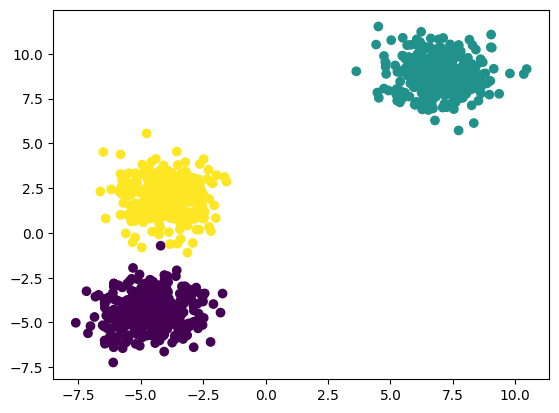

In [52]:
plt.scatter(X[:,0],X[:,1],c = y)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [54]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [55]:
## Elbow method
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(X_train_Scaled)
    wcss.append(model.inertia_)

In [56]:
wcss

[1400.0000000000011,
 205.83788018894586,
 47.069406088603024,
 41.14838841161415,
 35.85444486905646,
 32.835935990040426,
 27.05487851052097,
 24.14236267304849,
 22.796600213626437,
 20.861286482168772]

Text(0, 0.5, 'WCSS')

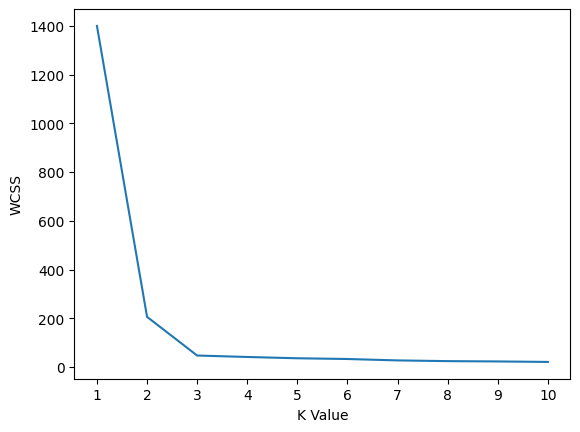

In [57]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('K Value')
plt.ylabel('WCSS')

In [58]:
model = KMeans(n_clusters=3,init='k-means++')

In [59]:
model.fit(X_train_Scaled)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [60]:
y_pred = model.predict(X_test_Scaled)

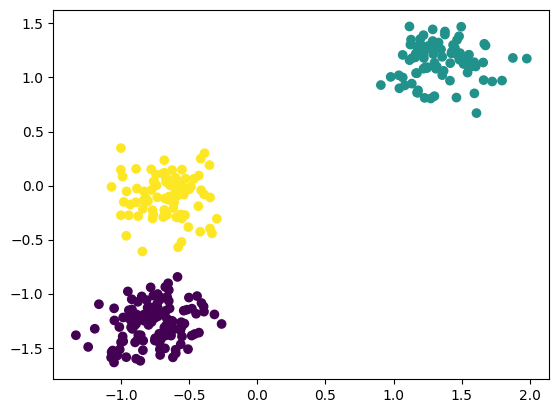

In [61]:
plt.scatter(X_test_Scaled[:,0],X_test_Scaled[:,1],c = y_pred)

## Validating k-Value

##### 1) Kneelocator
##### 2) Silhoutee Scoring

In [62]:
## Kneelocator
!pip install kneed


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from kneed import KneeLocator

In [64]:
kl = KneeLocator(range(1,11),wcss,curve = 'convex',direction='decreasing')

In [65]:
kl.curve

'convex'

In [66]:
kl.elbow

np.int64(3)

In [67]:
## Silhouttee Scoring
from sklearn.metrics import silhouette_score

In [68]:
silhouette_coeff =  []
for k in range(2,11):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(X_train_Scaled)
    silhouette_coeff.append(silhouette_score(X_train_Scaled,model.labels_))

In [69]:
silhouette_coeff

[0.7758549995735312,
 0.772797915322643,
 0.6592336527456182,
 0.51606068957173,
 0.33228664595186935,
 0.3372501715982625,
 0.33044064732869044,
 0.3293043139630487,
 0.33941376482863306]

Text(0, 0.5, 'Silhoutte Score')

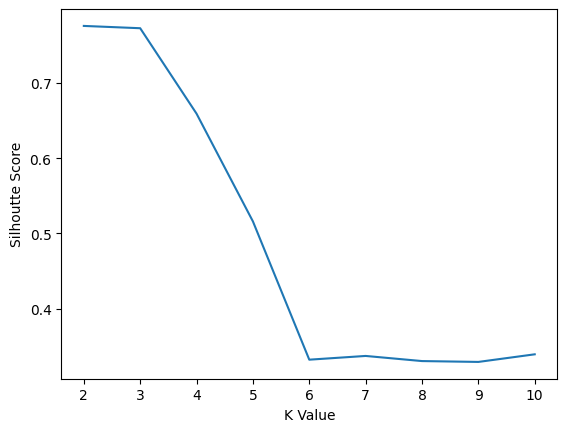

In [70]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel('K Value')
plt.ylabel('Silhoutte Score')